In [1]:
from lets_plot import *


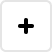
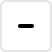
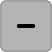
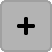
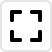
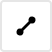
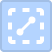
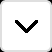
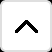
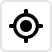
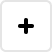
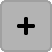
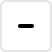
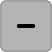
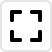
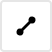
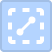
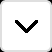
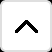
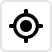

In [2]:
LetsPlot.setup_html()

In [3]:
LetsPlot.set_theme(theme_minimal())

#### Draw arrows

- the arrowhead always points to the specified coordinate of the segment
- the segment itself is drawn so that it does not intersect with its arrow
- no beveled corners (previously, acute angle could be drawn beveled)

In [4]:
def plot_with_arrows(angle, type='open'):
    return ggplot() \
            + geom_vline(xintercept=0) \
            + geom_vline(xintercept=1) \
            + geom_segment(x=0, xend=1, y=0, yend=0,
                           size=5,
                           alpha=0.5,
                           arrow=arrow(ends='both', type=type, length=75, angle=angle)) \
            + ggsize(600, 350)

In [5]:
plot_with_arrows(10)

In [6]:
plot_with_arrows(30)

#### 'space' parameter - additional space to shorten a segment by moving the start/end

In [7]:
ggplot() \
    + geom_vline(xintercept=0) \
    + geom_vline(xintercept=1) \
    + geom_segment(x=0, xend=1, y=0, yend=0,
                   size=5, 
                   alpha=0.5,
                   arrow=arrow(ends='both', type='open', length=75, angle=15),
                   spacer=15) \
    + ggsize(600, 200)

#### New aesthetics: `size_start,start_end` and `stroke_start,stroke_end`

In [8]:
x = [-1, 0, 1]
y = [-1, 1, -1]
shape = [1, 16, 21]
size = [1, 2, 3]
stroke = [1, 0, 2]

x_end = x[1:] + [x[0]]
y_end = y[1:] + [y[0]]
size_end = size[1:] + [size[0]]
stroke_end = stroke[1:] + [stroke[0]]

data = {
    'x': x,
    'y': y,
    'shape': shape,
    'size': size,
    'stroke': stroke,
    'x_end': x_end,
    'y_end': y_end,
    'size_end': size_end,
    'stroke_end': stroke_end,
}

plot = ggplot(data, aes('x','y')) \
    + geom_point(aes(size='size', shape='shape', stroke='stroke'), color='#4575b4', fill='#abd9e9') \
    + scale_size(range=[20,30], guide='none') \
    + scale_stroke(range=[0,10], guide='none') \
    + scale_shape_identity() \
    + lims(x=[-1.5, 1.5], y=[-1.5, 1.5])

plot

In [9]:
# Draw segments using offsets from start/end using aesthetics

# Also need to set the same scale settings:
se_scales = scale_continuous(['size_start','size_end'], range=[20,30], guide='none') \
    + scale_continuous(['stroke_start','stroke_end'], range=[0,10], guide='none')

plot \
    + geom_segment(aes(xend='x_end', yend='y_end', 
                   size_start='size', size_end='size_end',
                   stroke_start='stroke', stroke_end='stroke_end'),
                   arrow=arrow(type='open', ends='both', length=15, angle=15)) \
    + se_scales

In [10]:
# For start coordfinate only

plot \
    + geom_segment(aes(xend='x_end', yend='y_end', 
                   size_end='size_end', stroke_end='stroke_end'),
                   arrow=arrow(type='open', ends='last', length=15, angle=15)) \
    + se_scales

In [11]:
# Example from https://stackoverflow.com/questions/14647988/arranging-arrows-between-points-nicely-in-ggplot2

import pandas as pd
import numpy as np

np.random.seed(7)

points = pd.DataFrame({
    'x': np.random.uniform(size=10),
    'y': np.random.uniform(size=10),
    'class': np.arange(1, 11),
    'size': np.random.uniform(1000, 100000, size=10)
})

trans = pd.DataFrame({
    'from': np.repeat(np.arange(1, 11), 10),
    'to': np.tile(np.arange(1, 11), 10),
    'amount': np.random.uniform(size=100) ** 3
})

trans = pd.merge(trans, points, left_on='from', right_on='class')
trans = pd.merge(trans, points, left_on='to', right_on='class', suffixes=('.to', '.from'))

trans = trans.loc[(trans['amount'] >= 0.6)]

In [12]:
ggplot(points, aes(x='x', y='y')) \
    + geom_point(aes(size='size'), color="red", shape=1, stroke=0.75) \
    + geom_segment(aes(x='x.from', y='y.from', xend='x.to', yend='y.to', 
                       size_start='size.from', size_end='size.to'), 
                   data=trans,
                   stroke_start=0.75, stroke_end=0.75,
                   alpha=0.7, 
                   arrow=arrow(type='open', ends='both')) \
    + scale_continuous(['size','size_start','size_end'], range=[4,20])

In [13]:
# From doc

import numpy as np

T = 25
np.random.seed(42)
t = [0, *np.random.normal(size=T)]
x = np.cumsum(np.cos(t))
y = np.cumsum(np.sin(t))

ggplot({'x': x[:-1], 'y': y[:-1], 'xend': x[1:], 'yend': y[1:]}, aes(x='x', y='y')) \
    + geom_segment(aes(xend='xend', yend='yend', color='xend'),
                 arrow=arrow(type='closed', angle=10)) \
    + scale_color_gradient(low='#2c7bb6', high='#d7191c') \
    + coord_fixed()

In [14]:
# on LiveMap

# use constants

ggplot(data, aes('x','y')) \
    + geom_livemap() \
    + geom_point(size=20, color='#4575b4', alpha=0.5) \
    + geom_segment(aes(xend='x_end', yend='y_end'),
                   size_start=20, size_end=20,
                   size=4,
                   arrow=arrow(type='closed', ends='last', angle=15))

In [15]:
# Mappings

ggplot(data, aes('x', 'y')) \
    + geom_livemap() \
    + geom_point(aes(size='size', shape='shape', stroke='stroke'),data=data, color='#4575b4', fill='#abd9e9') \
    + geom_segment(aes(xend='x_end', yend='y_end', 
                       size_start='size', size_end='size_end',
                       stroke_start='stroke', stroke_end='stroke_end'),
                   size=4,
                   arrow=arrow(type='closed', ends='last', angle=15)) \
    + scale_shape_identity() \
    + scale_continuous(['size', 'size_start','size_end'], range=[20,30], guide='none') \
    + scale_continuous(['stroke', 'stroke_start','stroke_end'], range=[0,10], guide='none')

#### From 'Pushkin as Travller' notebook

In [16]:
def set_stay_time(data):
    current_moves = moves_df[(moves_df.departure == data['name'])|(moves_df.arrival == data['name'])]
    years = current_moves.year.sort_values().unique()
    years_combined = []
    for year in years:
        if len(years_combined) == 0 or years_combined[-1][1] + 1 != year:
            years_combined.append((year, year))
        else:
            years_combined[-1] = (years_combined[-1][0], year)
    years_combined = [str(year_from) if year_from == year_to else '{0}-{1}'.format(year_from, year_to) \
                      for year_from, year_to in years_combined]
    data['years'] = ', '.join(years_combined)
    return data

places_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/pushkin/places.csv')
moves_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/pushkin/moves.csv')
df = moves_df.merge(places_df, left_on='departure', right_on='name')\
             .rename(columns=dict(longitude='from_lon', latitude='from_lat'))\
             .drop(columns=['name'])\
             .merge(places_df, left_on='arrival', right_on='name')\
             .rename(columns=dict(longitude='to_lon', latitude='to_lat'))\
             .drop(columns=['name'])
places_df['years'] = ''
places_df = places_df.apply(set_stay_time, axis=1)

In [17]:
ggplot() + \
    geom_livemap(const_size_zoomin=3) + \
    geom_segment(aes(x='from_lon', y='from_lat', xend='to_lon', yend='to_lat', color='path'), data=df,
                 size_start=3, size_end=3,
                 tooltips=layer_tooltips().title("Trip").line("@path"),
                 arrow=arrow(type='closed', length=10, angle=15), size=1) + \
    geom_point(aes(x='longitude', y='latitude'), data=places_df, size=3, color='#F7F4F0',
               tooltips=layer_tooltips().title('@name').line('visited in|@years')) + \
    geom_point(aes(x='longitude', y='latitude'), data=places_df, size=1.7, color='black',
               tooltips='none') + \
    scale_color_manual(name='trip name', values=['#addd8e', '#e34a33', '#8856a7', '#2c7fb8',
                                                 '#1c9099', '#006d2c', '#fec44f', '#636363']) + \
    coord_cartesian(xlim=[26, 58], ylim=[38, 62]) + \
    ggtitle("Alexander Pushkin's Trips") + \
    ggsize(800, 600) + \
    theme(axis_title='blank', axis_text='blank', axis_ticks='blank', axis_line='blank')

In [18]:
mX = 37.618423
mY = 55.751244
pointSize = 2

ggplot(places_df, aes(x='longitude', y='latitude')) + \
    geom_livemap() + \
    geom_point(size=pointSize, color='red') + \
    geom_segment(xend=mX, yend=mY,
                 size=0.2,
                 size_start=pointSize, size_end=pointSize)